In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split

from src.preprocessing import get_processed_data
from src.train import train_and_evaluate_baseline, evaluate, load_file_if_exists, save_file, plot_f1_scores, train_w_hpam_search_and_eval

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform, loguniform
from sklearn.svm import SVC

from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
sns.set_theme('paper')


In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [3]:
target = "status_group"


## BASELINE

In [4]:
model_name = "baseline_log_reg_all_feat"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
baseline_log_reg_all_feat
Train: 0.5705
Test: 0.5623


## BASELINE + feature_engineer

In [5]:
model_name = "baseline_log_reg_all_feat_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="feature_engineer", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
baseline_log_reg_all_feat_fe
Train: 0.5541
Test: 0.5469


## BASELINE + Log_transform

In [6]:
model_name = "baseline_log_reg_all_feat_log_transform"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_all_feat_log_transform
Train: 0.5697
Test: 0.5631


## BASELINE + log_transform + feature_engineer

In [7]:
model_name = "baseline_log_reg_all_feat_log_transform_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform+feature_engineer ", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_all_feat_log_transform_fe
Train: 0.5528
Test: 0.5482


## BASELINE + log_transform + feature_engineer + remove_correlated

In [8]:
model_name = "baseline_log_reg_non_cor_feat_log_transform_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform+feature_engineer+remove_correlated", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_non_cor_feat_log_transform_fe
Train: 0.5203
Test: 0.5171


In [9]:
def plot_f1_scores(result_dict):
    # Convert dict → DataFrame
    df = pd.DataFrame(result_dict).T.reset_index()
    df.columns = ["Model", "Train F1", "Test F1"]

    # Melt for seaborn
    df_melted = df.melt(id_vars="Model", value_vars=["Train F1", "Test F1"],
                        var_name="Dataset", value_name="F1 Score")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x="Model", y="F1 Score", hue="Dataset")

    plt.title("Macro F1 Scores by Model")
    plt.ylim(0, 1)  # since F1 is bounded
    plt.xticks(rotation=20)
    plt.legend(title="")

    plt.tight_layout()
    plt.show()

## Complex Models with Hyperparam Tuning

In [ ]:
## Fix preset
PRESET_w_all = "log_transform+feature_engineer"
PRESET_wo_all = "log_transform+feature_engineer+remove_correlated"

In [ ]:
model_name = "random_forest_hpam_tuned_all"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(20, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET_w_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
random_forest_hpam_tuned
Train: 0.6247
Test: 0.5872


In [ ]:
model_name = "random_forest_hpam_tuned_no_all"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(20, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET_wo_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


In [ ]:
model_name = "random_forest_hpam_tuned_all"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET_w_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
random_forest_hpam_tuned_weighted_with_corr
Train: 0.6801
Test: 0.6391


In [ ]:
model_name = "random_forest_hpam_tuned_no_all"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET_wo_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


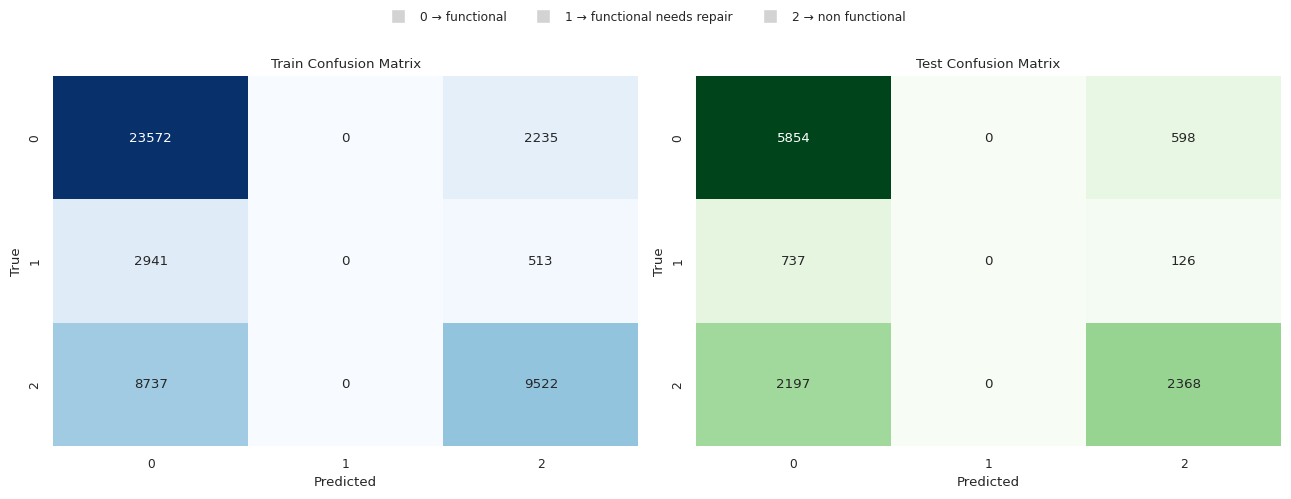

adaboost_hpam_tuned
Train: 0.4653
Test: 0.4623


In [ ]:
model_name = "adaboost_hpam_tuned_all"
adb = AdaBoostClassifier(random_state=SEED)
param_dist = {
    "n_estimators": randint(50, 1000),
    "learning_rate": loguniform(1e-3, 1.0),
    "algorithm": ["SAMME", "SAMME.R"],
}
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=adb, preset_name=PRESET_w_all, model_name=model_name, param_dist=param_dist, seed=SEED
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [ ]:
model_name = "adaboost_hpam_tuned_no_all"
adb = AdaBoostClassifier(random_state=SEED)
param_dist = {
    "n_estimators": randint(50, 1000),
    "learning_rate": loguniform(1e-3, 1.0),
    "algorithm": ["SAMME", "SAMME.R"],
}
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=adb, preset_name=PRESET_wo_all, model_name=model_name, param_dist=param_dist, seed=SEED
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


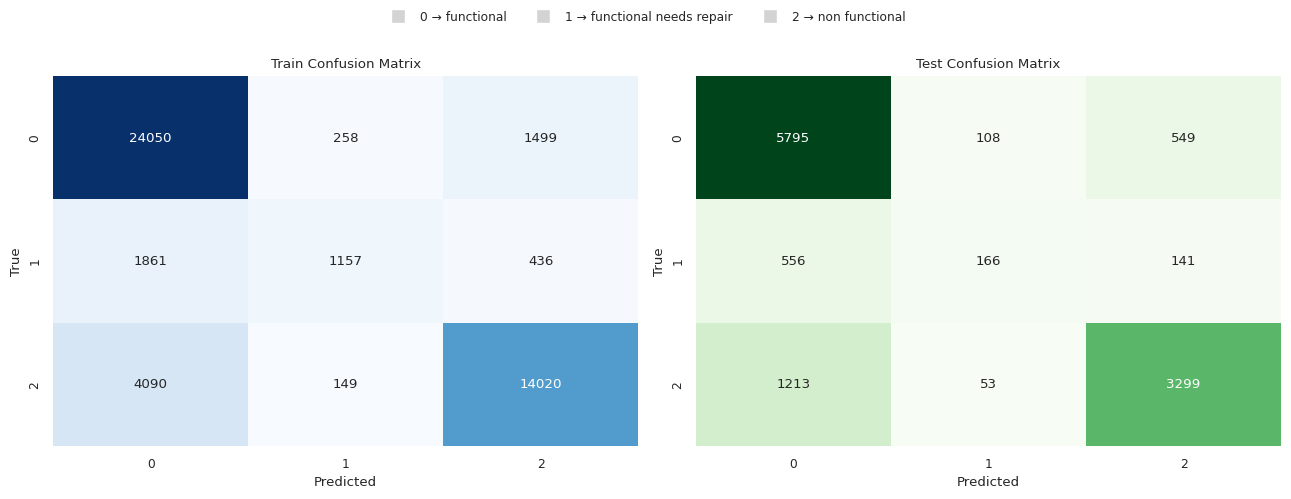

hgb_hpam_tuned_r2
Train: 0.7142
Test: 0.6257


In [ ]:
model_name = "hgb_hpam_tuned_all"
hgb = HistGradientBoostingClassifier(random_state=SEED)
param_dist = {
    "learning_rate": loguniform(1e-3, 1.0),
    "max_depth": randint(2, 20),
    "max_leaf_nodes": randint(15, 255),
    "min_samples_leaf": randint(10, 200),
    "l2_regularization": loguniform(1e-2, 1e2),
    "max_bins": randint(64, 255),
}
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=hgb, preset_name=PRESET_w_all, model_name=model_name, param_dist=param_dist, seed=SEED
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [ ]:
model_name = "hgb_hpam_tuned_no_all"
hgb = HistGradientBoostingClassifier(random_state=SEED)
param_dist = {
    "learning_rate": loguniform(1e-3, 1.0),
    "max_depth": randint(2, 20),
    "max_leaf_nodes": randint(15, 255),
    "min_samples_leaf": randint(10, 200),
    "l2_regularization": loguniform(1e-2, 1e2),
    "max_bins": randint(64, 255),
}
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=hgb, preset_name=PRESET_wo_all, model_name=model_name, param_dist=param_dist, seed=SEED
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [ ]:
from xgboost import XGBClassifier


Fitting 5 folds for each of 10 candidates, totalling 50 fits


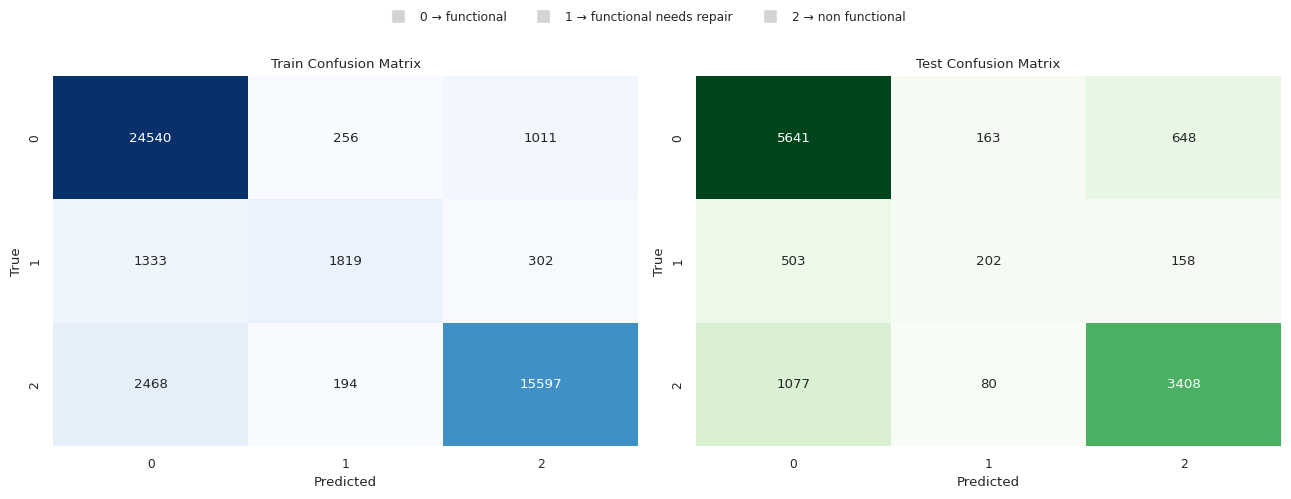

xgb_hpam_tuned
Train: 0.8097
Test: 0.6368


In [ ]:
model_name = "xgb_hpam_tuned_all"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(3, 10),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-3, 1e0),     # L1
    "reg_lambda": loguniform(1e-3, 1e2),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name=PRESET_w_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [ ]:
model_name = "xgb_hpam_tuned_no_all"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(3, 10),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-3, 1e0),     # L1
    "reg_lambda": loguniform(1e-3, 1e2),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name=PRESET_wo_all,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
